# 如何用Python提取中文关键词？
本文一步步为你演示，如何用Python从中文文本中提取关键词。如果你需要对长文“观其大略”，不妨尝试一下。(单一文本关键词的提取方法)

In [1]:
# -*- coding=utf-8 -*-
import jieba.analyse
import jieba
with open('../docs/HLS.TXT', encoding='utf-8') as f:
    data = f.read()

分别使用TF-idf、TextRank方式提取关键词和权重，并且依次显示出来。（如果你不做特殊指定的话，默认显示数量为20个关键词）

In [2]:
for keyword, weight in jieba.analyse.extract_tags(data, topK=30, withWeight=True):
    print('%s %s' % (keyword, weight))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.739 seconds.
Prefix dict has been built succesfully.
华莱士 0.5749792168986129
汉堡 0.39108807238491805
好吃 0.18820287275831382
肯德基 0.1857926040998919
麦当劳 0.11563439110617907
真的 0.07408812614285894
便宜 0.07396013976410017
一次 0.06974735565839488
炸鸡 0.06642716486849216
味道 0.06475143603225725
德克士 0.05765657252431995
觉得 0.0565446127618267
难吃 0.054525272124085755
拉肚子 0.0510693509814628
喜欢 0.03801040729809764
但是 0.03759348759755
鸡肉 0.03578067993249685
还是 0.032300304126679884
薯条 0.029981417712646376
时候 0.029359099382223024
确实 0.028899676051752837
感觉 0.02845638481366961
不是 0.0279917520942713
一个 0.027916646274031703
面包 0.02659056267602594
卫生 0.02659000729389299
口感 0.025721449335164834
快餐 0.025142123629886506
鸡腿 0.025111531198126463
全鸡 0.02368986534532517


In [3]:
for keyword, weight in jieba.analyse.textrank(data, topK=30, withWeight=True):
    print('%s %s' % (keyword, weight))

汉堡 1.0
好吃 0.5304031482956758
觉得 0.2523369876396637
时候 0.21590221764979434
味道 0.20808545246677906
没有 0.1741913301947089
炸鸡 0.16121263198244887
喜欢 0.12382830748818638
感觉 0.12101099161553466
东西 0.12039826364377926
还有 0.10571054085936434
知道 0.10263967928708297
拉肚子 0.10085065505956949
面包 0.09398843522247308
问题 0.09089425108982775
恶心 0.0895182347353987
快餐 0.08827066864970727
基本 0.0805333094425585
成本 0.07868670593642811
鸡肉 0.07727117260094155
可能 0.07692154024663224
口感 0.07338423510500078
价格 0.0721763594894579
放在 0.0718558257493552
员工 0.06518130491144443
不能 0.06508537703623074
中国 0.06502458480216267
牛肉 0.06407122276038998
鸡块 0.06404946799693292
外卖 0.06389963428980694


In [4]:
result=" ".join(jieba.cut(data))
print("切分结果:  "+result[0:99])

切分结果:  from :   https : / / weibo . com / 5636066639 / IyQH9uimB 
 虽然 味道 确实 不如 kfc 麦计 ， 但是 价格 确实 亲民 
 怎么 聊


Populating the interactive namespace from numpy and matplotlib


(-0.5, 799.5, 599.5, -0.5)

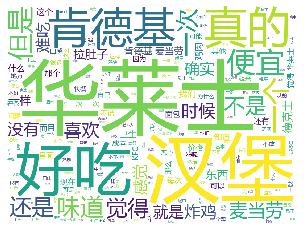

In [6]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    background_color="white", #背景颜色
    max_words=200, #显示最大词数
    width=800, # 输出的画布宽度，默认为400像素
    height=600,# 输出的画布高度，默认为400像素
    font_path=r"‪C:\Windows\Fonts\msyh.ttc",  #使用字体微软雅黑
    ).generate(result)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

### 原理

我们简要讲解一下，前文出现的2种不同关键词提取方式——TF-idf和TextRank的基本原理。

为了不让大家感到枯燥，这里咱们就不使用数学公式了。后文我会给出相关的资料链接。如果你对细节感兴趣，欢迎按图索骥，查阅学习。

先说TF-idf。

它的全称是 Term Frequency - inverse document frequency。中间有个连字符，左右两侧各是一部分，共同结合起来，决定某个词的重要程度。

第一部分，就是词频（Term Frequency），即某个词语出现的频率。

我们常说“重要的事说三遍”。

同样的道理，某个词语出现的次数多，也就说明这个词语重要性可能会很高。

但是，这只是可能性，并不绝对。

例如现代汉语中的许多虚词——“的，地，得”，古汉语中的许多句尾词“之、乎、者、也、兮”，这些词在文中可能出现许多次，但是它们显然不是关键词。

这就是为什么我们在判断关键词的时候，需要第二部分（idf）配合。

逆文档频率（inverse document frequency）首先计算某个词在各文档中出现的频率。假设一共有10篇文档，其中某个词A在其中10篇文章中都出先过，另一个词B只在其中3篇文中出现。请问哪一个词更关键？

给你一分钟思考一下，然后继续读。

公布答案时间到。

答案是B更关键。

A可能就是虚词，或者全部文档共享的主题词。而B只在3篇文档中出现，因此很有可能是个关键词。

逆文档频率就是把这种文档频率取倒数。这样第一部分和第二部分都是越高越好。二者都高，就很有可能是关键词了。

TF-idf讲完了，下面我们说说TextRank。

相对于TF-idf，TextRank要显得更加复杂一些。它不是简单做加减乘除运算，而是基于图的计算。

文章来源：https://zhuanlan.zhihu.com/p/31870596?group_id=923093802266013696